In [2]:
import os
import numpy as np
import pandas as pd
from scipy import signal
from datetime import datetime, timedelta
import argparse
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("weight.csv", header=None)
df.dropna(inplace=True)
# Rename columns
df.columns = ["Q"]
df["Q"] = df["Q"].astype(int)
df["Index"] = range(len(df))

sampled_data_raw = df["Q"]

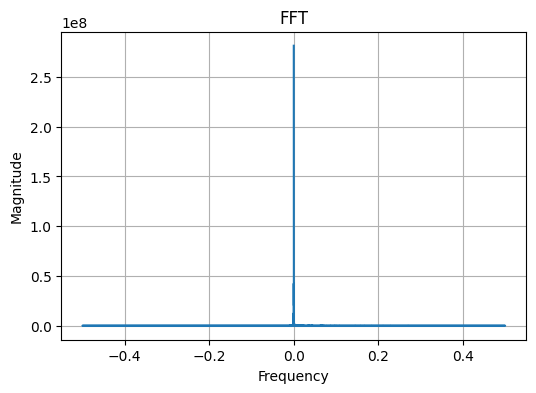

In [4]:
# Perform FFT
fft = np.fft.fft(sampled_data_raw, len(sampled_data_raw))
freq = np.fft.fftfreq(len(sampled_data_raw))

width_px = 600
height_px = 400
dpi = plt.rcParams['figure.dpi']

# Plot FFT
plt.figure(figsize=(width_px/dpi, height_px/dpi), dpi=dpi)
plt.plot(freq, np.abs(fft))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('FFT')
plt.grid(True)

[2.46193005e-06 4.92386009e-06 2.46193005e-06]
[ 1.         -1.99555712  0.99556697]


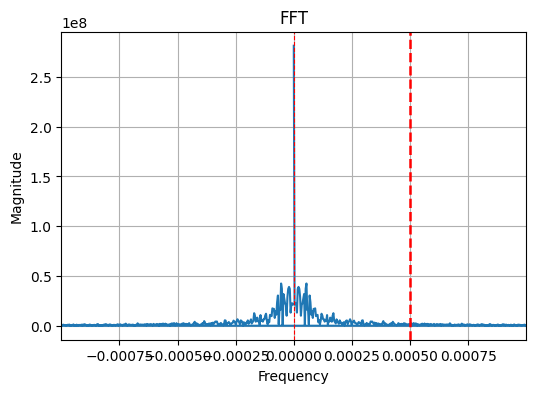

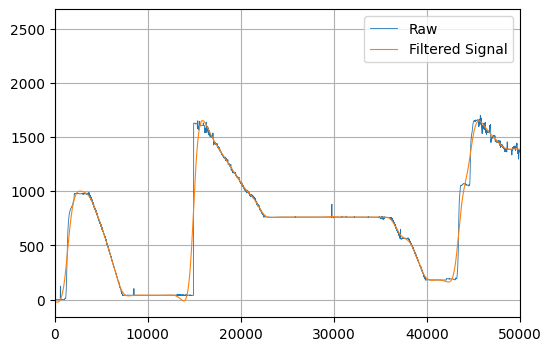

In [5]:
# Cut the FFT around the middle frequency
mid_freq = np.quantile(freq, 0.5)
bandwidth = 0.0005
cutoff_frequency = mid_freq + bandwidth
plt.figure(plt.figure(figsize=(width_px/dpi, height_px/dpi), dpi=dpi))
plt.plot(freq, np.abs(fft))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.xlim(np.quantile(freq, 0.5 - bandwidth * 2), np.quantile(freq, 0.5 + bandwidth * 2))
plt.axvline(cutoff_frequency, color='r', linestyle='--', label='Cutoff Frequency', linewidth=1.8)
plt.axvline(mid_freq, color='r', linestyle='--', linewidth=0.8)
plt.title('FFT')
plt.grid(True)
plt.title('FFT')
plt.grid(True)
#construct butterworth filter
nyquist_frequency = 0.5 * 1
normalized_cutoff = cutoff_frequency / nyquist_frequency
b, a = signal.butter(2, normalized_cutoff, 'low', analog=False)
#zi = signal.lfilter_zi(b, a)
#filtered_signal, _ = signal.lfilter(b, a, sampled_data_raw, zi=zi*sampled_data_raw[0])
filtered_signal = signal.filtfilt(b, a, sampled_data_raw)

plt.figure(plt.figure(figsize=(width_px/dpi, height_px/dpi), dpi=dpi))
plt.plot(df["Index"], sampled_data_raw, label="Raw", linewidth=0.6)
plt.plot(df["Index"], filtered_signal, label="Filtered Signal", linewidth=0.8)
plt.xlim(0, 50000)
plt.legend()
plt.grid(True)

# get the impulse response of the filter
print(b)
print(a)
#print(zi)
#plt.figure(plt.figure(figsize=(width_px/dpi, height_px/dpi), dpi=dpi))
#plt.plot(t, kernel)
#plt.grid(True)


-1622936.8969837897,-86059.08088774093,210801.7519977635,190689.66220250374,122346.0666812559,68858.97640670757,36153.964226751224,18176.961049649064,8868.067382691228


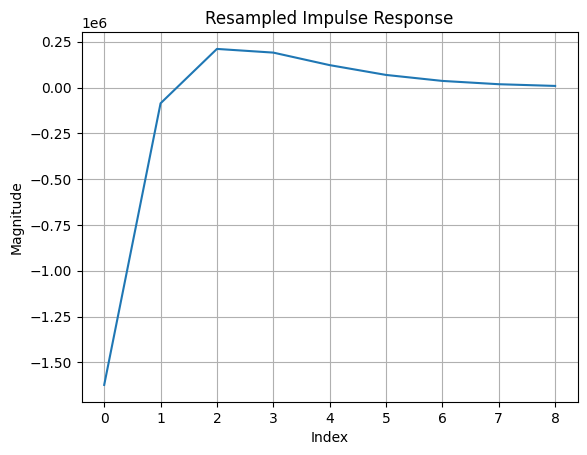

In [7]:
a = [2.46193005e-06, 4.92386009e-06, 2.46193005e-06]
b = [ 1.,         -1.99555712,  0.99556697]

# Get the impulse response of the filter
_, h = signal.impulse((b, a))

# Print the real impulse response

desired_len = 9

h_real_resampled = np.interp(np.linspace(0, len(h) - 1, desired_len), np.arange(len(h)), h.real)
#join values h_real_resampled with ',' glue
print(','.join(map(str, h_real_resampled)))

#plot h_real_resampled
import matplotlib.pyplot as plt

plt.plot(h_real_resampled)
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.title('Resampled Impulse Response')
plt.grid(True)

In [ ]:
import os
import numpy as np
import pandas as pd
import udsp
import matplotlib.pyplot as plt